## Data Cleaning & Simple Statistical Analysis

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

import warnings
# Ignore the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
drive.mount('/content/drive')
original_df = pd.read_csv("/content/drive/My Drive/CBE512_FinalProject/Original_Data/NCDB_1999_to_2014.csv")
print(original_df.head())

Mounted at /content/drive


<ipython-input-2-d425f60d9bf3>:2: DtypeWarning: Columns (1,2,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv("/content/drive/My Drive/CBE512_FinalProject/Original_Data/NCDB_1999_to_2014.csv")


   C_YEAR C_MNTH C_WDAY C_HOUR  C_SEV C_VEHS C_CONF C_RCFG C_WTHR C_RSUR  ...  \
0    1999      1      1     20      2     02     34     UU      1      5  ...   
1    1999      1      1     20      2     02     34     UU      1      5  ...   
2    1999      1      1     20      2     02     34     UU      1      5  ...   
3    1999      1      1     08      2     01     01     UU      5      3  ...   
4    1999      1      1     08      2     01     01     UU      5      3  ...   

  V_ID V_TYPE V_YEAR P_ID P_SEX P_AGE P_PSN P_ISEV P_SAFE P_USER  
0   01     06   1990   01     M    41    11      1     UU      1  
1   02     01   1987   01     M    19    11      1     UU      1  
2   02     01   1987   02     F    20    13      2     02      2  
3   01     01   1986   01     M    46    11      1     UU      1  
4   99     NN   NNNN   01     M    05    99      2     UU      3  

[5 rows x 22 columns]


In [ ]:
original_df.columns

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER'],
      dtype='object')

In [ ]:
df = original_df[['C_HOUR', 'C_CONF', 'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF',
                       'V_TYPE', 'V_YEAR', 'P_SEX', 'P_AGE']]

print(df.head())

  C_HOUR C_CONF C_RCFG C_WTHR C_RSUR C_RALN C_TRAF V_TYPE V_YEAR P_SEX P_AGE
0     20     34     UU      1      5      3     03     06   1990     M    41
1     20     34     UU      1      5      3     03     01   1987     M    19
2     20     34     UU      1      5      3     03     01   1987     F    20
3     08     01     UU      5      3      6     18     01   1986     M    46
4     08     01     UU      5      3      6     18     NN   NNNN     M    05


In [ ]:
df.dtypes

C_HOUR    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_TYPE    object
V_YEAR    object
P_SEX     object
P_AGE     object
dtype: object

In [ ]:
df = df[~df['C_HOUR'].isin(['UU', 'XX'])]
unique_values = df['C_HOUR'].unique()
print(unique_values)

['20' '08' '17' '15' '14' '01' '11' '13' '19' '16' '09' '02' '18' '12'
 '10' '23' '00' '06' '07' '21' '05' '22' '03' '04']


In [ ]:
df = df[~df['C_CONF'].isin(['QQ', 'UU', 'XX'])]
unique_values = df['C_CONF'].unique()
print(unique_values)

['34' '01' '04' '31' '21' '23' '03' '02' '33' '24' '35' '41' '06' '32'
 '36' '05' '22' '25']


In [ ]:
df = df[~df['C_RCFG'].isin(['QQ', 'UU', 'XX'])]
unique_values = df['C_RCFG'].unique()
print(unique_values)

['02' '03' '05' '01' '04' '06' '08' '07' '09' '10']


In [ ]:
df = df[~df['C_WTHR'].isin(['Q', 'U'])]
unique_values = df['C_WTHR'].unique()
print(unique_values)

['1' '3' '4' '2' '6' '5' '7']


In [ ]:
df = df[~df['C_RSUR'].isin(['Q', 'U'])]
unique_values = df['C_RSUR'].unique()
print(unique_values)

['1' '2' '5' '3' '7' '4' '6' '8' '9']


In [ ]:
df = df[~df['C_RALN'].isin(['Q', 'U'])]
unique_values = df['C_RALN'].unique()
print(unique_values)

['1' '3' '4' '2' '5' '6']


In [ ]:
df = df[~df['C_TRAF'].isin(['UU', 'QQ'])]
unique_values = df['C_TRAF'].unique()
print(unique_values)

['01' '05' '18' '06' '03' '04' '07' '08' '10' '16' '02' '13' '11' '15'
 '17' '09' '12']


In [ ]:
df = df[~df['V_TYPE'].isin(['UU', 'QQ', 'NN'])]
unique_values = df['V_TYPE'].unique()
print(unique_values)

['01' '06' '07' '17' '11' '08' '20' '09' '22' '14' '05' '16' '23' '19'
 '18' '10' '21']


In [ ]:
df = df[~df['V_YEAR'].isin(['UUUU', 'QQQQ', 'NNNN'])]
unique_values = df['V_YEAR'].unique()
print(unique_values)

['1992' '1988' '1995' '1989' '1994' '1986' '1990' '1998' '1991' '1984'
 '1993' '1987' '1997' '1985' '1996' '1999' '1977' '1978' '1981' '1972'
 '1983' '2000' '1979' '1976' '1982' '1975' '1973' '1974' '1980' '1967'
 '1970' '1971' '1968' '1969' '1966' '1945' '1960' '1950' '1965' '1959'
 '1955' '1958' '1964' '1909' '1949' '1923' '1963' '1961' '1914' '1908'
 '1953' '1906' '1939' '1925' '1948' '1962' '1938' '1907' '1917' '1912'
 '1944' '1956' '1930' '1931' '1951' '1946' '1952' '1947' '1957' '1954'
 '1901' '1937' '1935' '1926' '1941' '1932' '1920' '1903' '1933' '1919'
 '2001' '1913' '1940' '2002' '1916' '1929' '1928' '1942' '1918' '2003'
 '1924' '1922' '1915' '1934' '2004' '2005' '1927' '2006' '2007' '2008'
 '1943' '2009' '2010' '2011' '1911' '2012' '2013' '1921' '2014' '2015']


In [ ]:
df = df[~df['P_SEX'].isin(['U', 'X', 'N'])]
# Create a dictionary to map values
sex_mapping = {'F': 1, 'M': 2}
# Replace the 'P_SEX' column with the dummy variable values
df['P_SEX'] = df['P_SEX'].map(sex_mapping)
unique_values = df['P_SEX'].unique()
print(unique_values)

[1 2]


In [ ]:
df = df[~df['P_AGE'].isin(['UU', 'XX', 'NN'])]
unique_values = df['P_AGE'].unique()
print(unique_values)

['33' '70' '38' '34' '30' '18' '83' '68' '28' '37' '50' '20' '53' '71'
 '26' '51' '41' '63' '25' '23' '55' '36' '16' '35' '60' '13' '31' '64'
 '44' '61' '65' '75' '48' '79' '46' '32' '62' '52' '49' '85' '42' '21'
 '17' '19' '40' '29' '92' '57' '86' '69' '74' '59' '43' '54' '15' '12'
 '76' '39' '73' '04' '27' '47' '22' '58' '78' '66' '45' '80' '24' '82'
 '11' '07' '72' '56' '14' '84' '67' '01' '77' '09' '02' '10' '06' '08'
 '03' '05' '81' '89' '87' '88' '95' '90' '91' '94' '99' '93' '98' '96'
 '97']


In [ ]:
for column_name in df.select_dtypes(include=['object']).columns:
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
df.dtypes

C_HOUR    int64
C_CONF    int64
C_RCFG    int64
C_WTHR    int64
C_RSUR    int64
C_RALN    int64
C_TRAF    int64
V_TYPE    int64
V_YEAR    int64
P_SEX     int64
P_AGE     int64
dtype: object

In [ ]:
column_name_mapping = {
    'C_HOUR': 'Hour',
    'C_CONF': 'Colision_Configuration',
    'C_RCFG': 'Rd_Configuration',
    'C_WTHR': 'Weather',
    'C_RSUR': 'Rd_Surface',
    'C_RALN': 'Rd_Alignment',
    'C_TRAF': 'Trafic_Control',
    'V_TYPE': 'Vehicle_Type',
    'V_YEAR': 'Vehicle_Year',
    'P_SEX': 'Driver_Sex',
    'P_AGE': 'Driver_Age'
}

# Rename the columns using the rename() method
df.rename(columns=column_name_mapping, inplace=True)

# Print the number of rows
df.shape[0]

3853678

In [ ]:
# Calculate the range for each column
column_ranges = df.max() - df.min()

# Print the range for each column
print("Range of each column:")
for column in df.columns:
    min_value = df[column].min()
    max_value = df[column].max()
    range_value = max_value - min_value
    print(f"{column}: Min={min_value}, Max={max_value}, Range={range_value}")

Range of each column:
Hour: Min=0, Max=23, Range=23
Colision_Configuration: Min=1, Max=41, Range=40
Rd_Configuration: Min=1, Max=10, Range=9
Weather: Min=1, Max=7, Range=6
Rd_Surface: Min=1, Max=9, Range=8
Rd_Alignment: Min=1, Max=6, Range=5
Trafic_Control: Min=1, Max=18, Range=17
Vehicle_Type: Min=1, Max=23, Range=22
Vehicle_Year: Min=1901, Max=2015, Range=114
Driver_Sex: Min=1, Max=2, Range=1
Driver_Age: Min=1, Max=99, Range=98


In [ ]:
# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=42)

## Unsupervised Clustering

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()
# Fit and transform your data
scaled_data = scaler.fit_transform(df)

In [ ]:
# Reduce the dimensionality to 2 using PCA
pca = PCA(n_components = 2)
reduced_data = pca.fit_transform(scaled_data)

In [ ]:
# Define a range of cluster numbers to try
cluster_range = range(2,7)
silhouette_scores = []

best_score = -1 # initiallize the silhoutte score
best_num_clusters = None

# Loop through different numbers of clusters
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters = num_clusters, random_state=0)
    kmeans.fit(reduced_data)
    cluster_labels = kmeans.labels_
    score = silhouette_score(reduced_data, cluster_labels)
    silhouette_scores.append(score)

    print(f"Number of Clusters: {num_clusters}, Silhoutte Score: {score}")
    # Update the best score and number of clusters if the current score is higher
    if score > best_score:
        best_score = score
        best_num_clusters = num_clusters

print(f"Best Number of Clusters: {best_num_clusters}, Best Silhouette Score: {best_score}")

Number of Clusters: 2, Silhoutte Score: 0.1430791457087829
Number of Clusters: 3, Silhoutte Score: 0.14129998900313898
Number of Clusters: 4, Silhoutte Score: 0.14570514916506758
Number of Clusters: 5, Silhoutte Score: 0.14218832842477772
Number of Clusters: 6, Silhoutte Score: 0.1354269822944501
Best Number of Clusters: 4, Best Silhouette Score: 0.14570514916506758


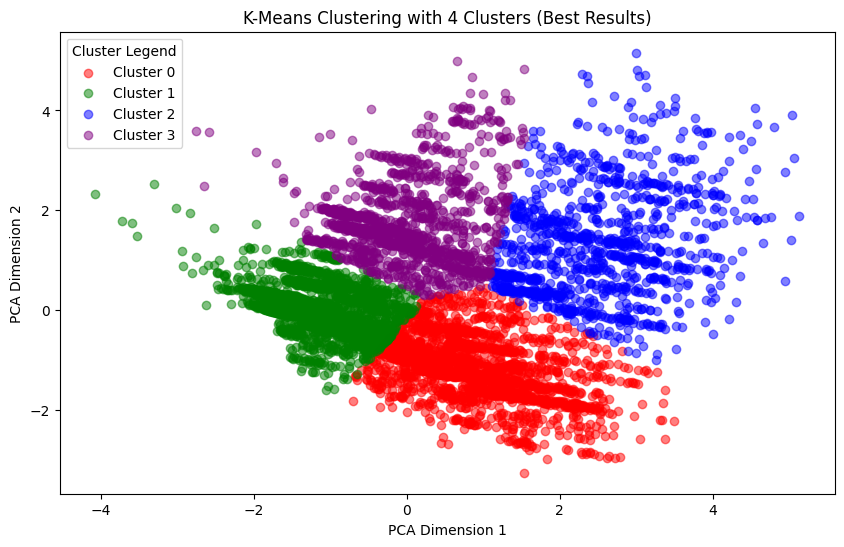

In [ ]:
# Plot the best clustering result
kmeans_best = KMeans(n_clusters = best_num_clusters, random_state=0)
kmeans_best.fit(reduced_data)
cluster_labels_best = kmeans_best.labels_

# Create a list of unique cluster labels
unique_labels = list(set(cluster_labels_best))
# Create a legend entry for each cluster
legend_labels = [f'Cluster {label}' for label in unique_labels]

colors = ['red', 'green', 'blue', 'purple']

# Plot the clusters
plt.figure(figsize=(10, 6))
for label, color in zip(unique_labels, colors):
    plt.scatter(reduced_data[cluster_labels_best == label, 0], reduced_data[cluster_labels_best == label, 1], c=color, label=f'Cluster {label}', alpha=0.5)

plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title(f"K-Means Clustering with {best_num_clusters} Clusters (Best Results)")

# Add the legend
plt.legend(title='Cluster Legend', labels=legend_labels)

plt.show()


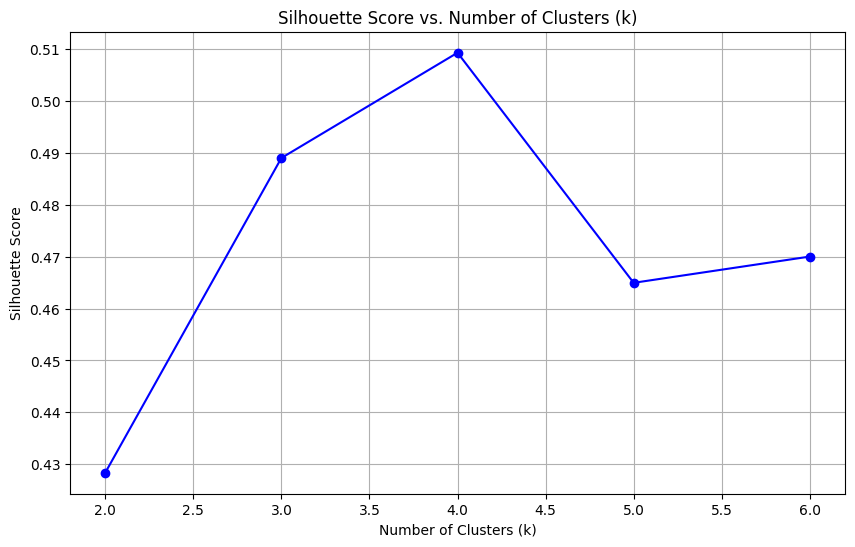

In [ ]:
# Plot the silhouette scores for different values of k
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.grid(True)
plt.show()

In [ ]:
# Get the loadings for the principal component (PC1 & PC2)
pc1_loadings = pca.components_[0]
pc2_loadings = pca.components_[1]

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame({'Feature': df.columns, "PC1 Loadings": pc1_loadings, "PC2 Loadings": pc2_loadings})
print(loadings_df)

                   Feature  PC1 Loadings  PC2 Loadings
0                     Hour     -0.124580      0.014943
1   Colision_Configuration     -0.465183      0.264468
2         Rd_Configuration     -0.408622      0.284918
3                  Weather      0.337478      0.603061
4               Rd_Surface      0.373553      0.581167
5             Rd_Alignment      0.322096     -0.081570
6           Trafic_Control      0.476769     -0.258628
7             Vehicle_Type      0.077641     -0.217727
8             Vehicle_Year      0.003278     -0.009836
9               Driver_Sex      0.062739     -0.157869
10              Driver_Age     -0.081543      0.035370


In [ ]:
# Iterate through each column and find the most frequent values
most_frequent_values = {}
for column in df.columns:
    most_frequent_value = df[column].value_counts().idxmax()  # Find the most frequent value
    most_frequent_count = df[column].value_counts().max()     # Find its count
    most_frequent_values[column] = {
        'Most Frequent Value': most_frequent_value,
        'Count': most_frequent_count
    }

# Create a dictionary to map column names to descriptions
column_descriptions = {
    'Hour': '16:00 to 16:59',
    'Colision_Configuration': 'Rear-end collision',
    'Rd_Configuration': 'At an intersection of at least two public roadways',
    'Weather': 'Clear and sunny',
    'Rd_Surface': 'Dry, normal',
    'Rd_Alignment': 'Straight and level',
    'Trafic_Control': 'No control present',
    'Vehicle_Type': 'Light Duty Vehicle',
    'Vehicle_Year': '2000',
    'Driver_Sex': 'Female',
    'Driver_Age': '18'
    # Add more column names and descriptions as needed
}


# Convert the result to a DataFrame for display
most_frequent_df = pd.DataFrame.from_dict(most_frequent_values, orient='index')
most_frequent_df['Description'] = most_frequent_df.index.map(column_descriptions)

# Display the most frequent values for each column
print("Most Frequent Values in Each Column:")
print(most_frequent_df)

Most Frequent Values in Each Column:
                        Most Frequent Value  Count  \
Hour                                     16    915   
Colision_Configuration                   21   3427   
Rd_Configuration                          2   5364   
Weather                                   1   7102   
Rd_Surface                                1   6763   
Rd_Alignment                              1   7751   
Trafic_Control                           18   5376   
Vehicle_Type                              1   8938   
Vehicle_Year                           2000    623   
Driver_Sex                                2   5631   
Driver_Age                               18    317   

                                                              Description  
Hour                                                       16:00 to 16:59  
Colision_Configuration                                 Rear-end collision  
Rd_Configuration        At an intersection of at least two public road...  
Weather   

### Simply checking the most frequent value dose not present meaningful insight. The most frequent weather condition is clear and sunny, which is the most frequent weather pattern in the real life.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances

# Fit a K-Means clustering model to the reduced data
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(reduced_data)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Calculate inter-cluster distances using Euclidean distance
inter_cluster_distances = pairwise_distances(cluster_centers, metric='euclidean')

# Display inter-cluster distances as a distance matrix
print("Inter-Cluster Distances (Euclidean):")
print(inter_cluster_distances)

Inter-Cluster Distances (Euclidean):
[[0.         2.27549225 2.99842094 2.9984239 ]
 [2.27549225 0.         3.92772418 2.11660428]
 [2.99842094 3.92772418 0.         2.55932094]
 [2.9984239  2.11660428 2.55932094 0.        ]]


In [ ]:
# Add the 'Cluster' column to the DataFrame
df['Cluster'] = cluster_labels_best

In [ ]:
# Explore Cluster Statistics
cluster_stats = df.groupby('Cluster').agg({
    'Hour': lambda x: x.mode().iloc[0],
    'Colision_Configuration': lambda x: x.mode().iloc[0],
    'Rd_Configuration': lambda x: x.mode().iloc[0],  # Calculate the most frequent values
    'Weather': lambda x: x.mode().iloc[0],
    'Rd_Surface': lambda x: x.mode().iloc[0],
    'Rd_Alignment': lambda x: x.mode().iloc[0],
    'Trafic_Control': lambda x: x.mode().iloc[0],
    'Vehicle_Type': lambda x: x.mode().iloc[0],
    'Vehicle_Year': lambda x: x.mode().iloc[0],
    'Driver_Sex': lambda x: x.mode().iloc[0],
    'Driver_Age': lambda x: x.mode().iloc[0]
})

cluster_stats

,Hour,Colision_Configuration,Rd_Configuration,Weather,Rd_Surface,Rd_Alignment,Trafic_Control,Vehicle_Type,Vehicle_Year,Driver_Sex,Driver_Age
Cluster,,,,,,,,,,,
0,16,21,1,1,1,1,18,1,2002,2,18
1,16,21,2,1,1,1,1,1,2002,2,17
2,16,21,1,4,2,1,18,1,2000,2,19
3,17,21,2,3,2,1,1,1,2000,1,18


In [ ]:
# Identify Key Features
# Hour: 16: 16:00 - 16:59, 17: 17:00 - 17:59
# Colision_Configuration: Rear-end collision
# Rd_Configuration - 1: Non-intersection (e.g., middle of blockNon-intersection), 2: At an intersection of at least two public roadways
# Weather - 1: Clear and sunny, 3: Raining
# Rd_Surface - 1: Dry, normal, 2: Wet
# Rd_Alignment - 1: Straight and level
# Trafic_Control - 1: Traffic signals fully operational, 18: No control present
# Vehicle_Type - 1: Light Duty
# Vehicle_Year: 2000 and 2002
# Driver_Sex: 1: Male, 2: Female
# Driver_Age: 17, 18, 19
# No change is vehicle type amoung groups

In [ ]:
# Assign Labels or Descriptions (Based on your interpretation)
data = df

cluster_descriptions = {
    0: '16, Rear-end collision, Non-intersection, Clear & Sunny, Dry normal, Straight and level, no controlled traffic, Light Duty Vehicle, 2002 model, female, 18 years old',
    1: '16, Rear-end collision, Intersection, Clear & Sunny, Dry normal, Straight and level, traffic signal, Light Duty Vehicle, 2002 model, female, 17 years old',
    2: '16, Rear-end collision, Non-intersection, Snowing, Wet, Straight and level, no controlled traffic, Light Duty Vehicle, 2000 model, female, 19 years old',
    3: '17, Rear-end collision, Intersection, Raining, Wet, Straight and level, traffic signal, Light Duty Vehicle, 2000 model, male, 18 years old'
}
data['Cluster_Label'] = data['Cluster'].map(cluster_descriptions)
data

,Hour,Colision_Configuration,Rd_Configuration,Weather,Rd_Surface,Rd_Alignment,Trafic_Control,Vehicle_Type,Vehicle_Year,Driver_Sex,Driver_Age,Cluster,Cluster_Label
661002,11,23,1,2,1,1,18,1,1996,1,33,0,"16, Rear-end collision, Non-intersection, Clea..."
3478168,11,41,1,1,1,1,18,1,2002,2,38,0,"16, Rear-end collision, Non-intersection, Clea..."
511436,17,21,2,2,1,1,2,1,1998,1,43,1,"16, Rear-end collision, Intersection, Clear & ..."
258858,22,34,2,1,1,1,3,11,1995,2,45,1,"16, Rear-end collision, Intersection, Clear & ..."
342248,16,6,1,4,5,1,18,1,1997,2,58,2,"16, Rear-end collision, Non-intersection, Snow..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564194,14,31,2,2,3,1,18,20,2004,2,47,0,"16, Rear-end collision, Non-intersection, Clea..."
4777832,11,21,1,1,1,1,18,1,2006,2,67,0,"16, Rear-end collision, Non-intersection, Clea..."
3444018,20,33,2,1,1,1,18,1,2003,2,30,1,"16, Rear-end collision, Intersection, Clear & ..."
5197752,8,36,2,1,1,1,3,1,2007,2,64,1,"16, Rear-end collision, Intersection, Clear & ..."
